## Quantum Fourier Transform

### Single computational basis state
#### First, let's try transforming a single computational basis state. We'll start with making a random computational state:

In [53]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFTGate
from qiskit_aer import AerSimulator
from qiskit.primitives import BackendSamplerV2

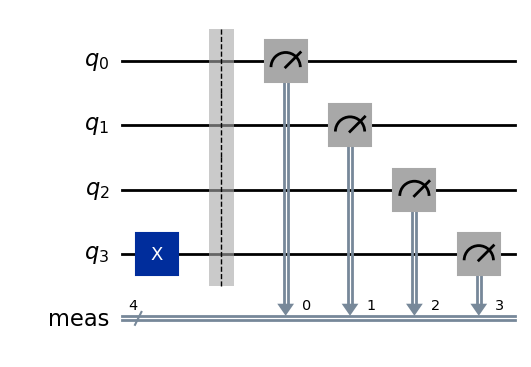

In [54]:
# Step 1: Map
qubits = 4
N = 2**qubits

qc = QuantumCircuit(qubits)

# flip state of random qubits to put in a random single computational basis state
for i in range(qubits):
    if np.random.randint(0,2):
        qc.x(i)

# make a copy of the above circuit. (to be used when we apply the QFT in next part)
qc_qft = qc.copy()

qc.measure_all()
qc.draw("mpl")

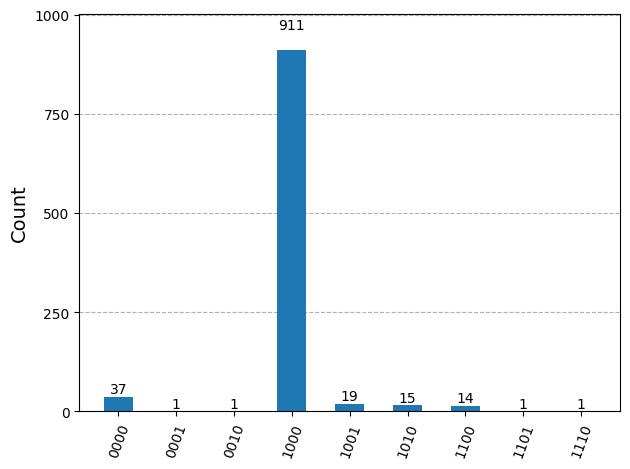

In [57]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

from qiskit.visualization import plot_histogram

from qiskit_ibm_runtime.fake_provider import FakeManilaV2
 
# Get a fake backend from the fake provider
backend = FakeManilaV2()

# Aer simulator with fake backend noise
backend = AerSimulator.from_backend(backend)

# Transpile
qc_sim = transpile(qc, backend)

# Run
job = backend.run(qc_sim, shots=1000)
result = job.result()

# Counts
counts = result.get_counts()

plot_histogram(counts)


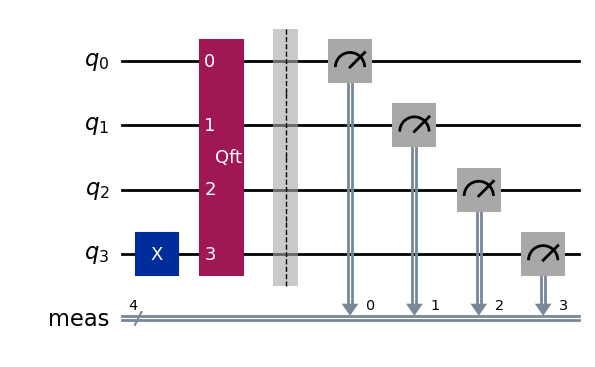

In [58]:
qc_qft.compose(QFTGate(qubits),inplace=True)
qc_qft.measure_all()
qc_qft.draw("mpl")

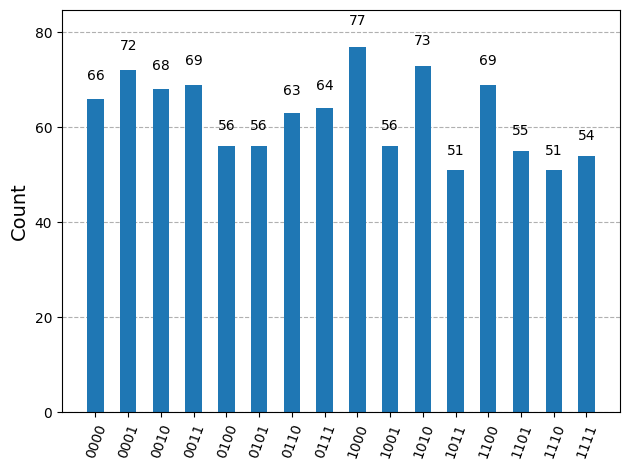

In [59]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

from qiskit.visualization import plot_histogram

from qiskit_ibm_runtime.fake_provider import FakeManilaV2
 
# Get a fake backend from the fake provider
backend = FakeManilaV2()

# Aer simulator with fake backend noise
backend = AerSimulator.from_backend(backend)

# Transpile
qc_sim1 = transpile(qc_qft, backend)

# Run
job = backend.run(qc_sim1, shots=1000)
result = job.result()

# Counts
counts = result.get_counts()

plot_histogram(counts)


### Two computational basis states

#### Now, let's see what happens when we prepare a superposition of computational basis states. 

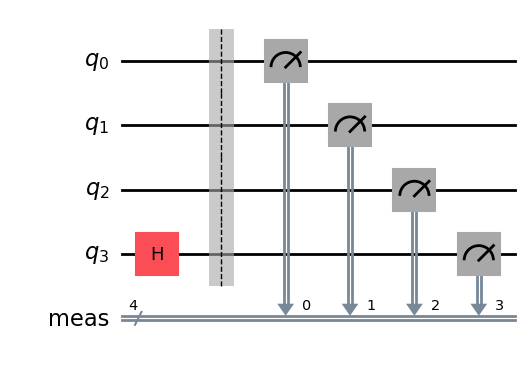

In [ ]:
qubits = 4
N = 2**qubits
qc = QuantumCircuit(qubits)
# To make this state, we just need to apply a Hadamard to the last qubit
qc.h(qubits-1)
qc_qft = qc.copy()
qc.measure_all()
qc.draw("mpl")

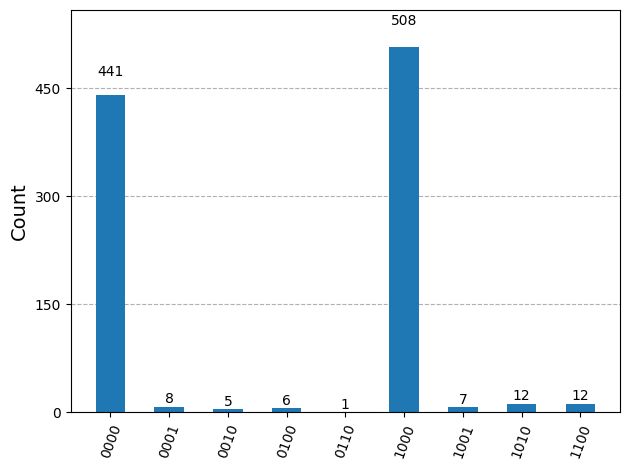

In [61]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

from qiskit.visualization import plot_histogram

from qiskit_ibm_runtime.fake_provider import FakeManilaV2
 
# Get a fake backend from the fake provider
backend = FakeManilaV2()

# Aer simulator with fake backend noise
backend = AerSimulator.from_backend(backend)

# Transpile
qc_sim = transpile(qc, backend)

# Run
job = backend.run(qc_sim, shots=1000)
result = job.result()

# Counts
counts = result.get_counts()

plot_histogram(counts)


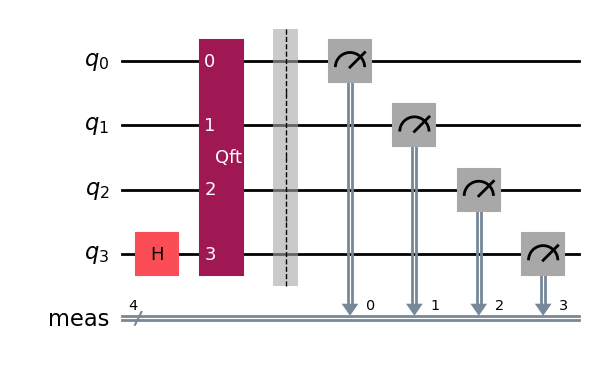

In [62]:
qc_qft.compose(QFTGate(qubits),inplace=True)
qc_qft.measure_all()
qc_qft.draw("mpl")

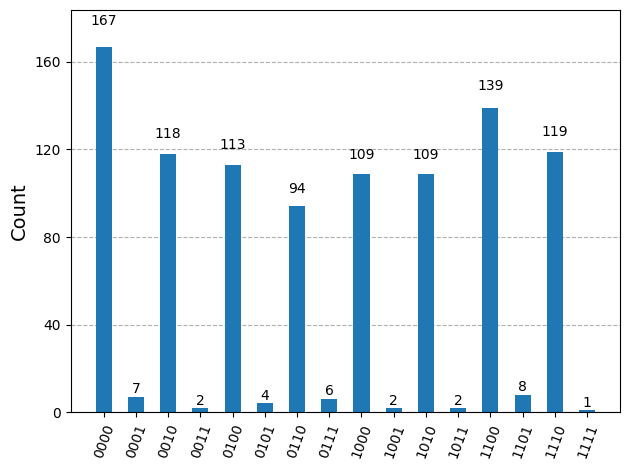

In [63]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

from qiskit.visualization import plot_histogram

from qiskit_ibm_runtime.fake_provider import FakeManilaV2
 
# Get a fake backend from the fake provider
backend = FakeManilaV2()

# Aer simulator with fake backend noise
backend = AerSimulator.from_backend(backend)

# Transpile
qc_sim1 = transpile(qc_qft, backend)

# Run
job = backend.run(qc_sim1, shots=1000)
result = job.result()

# Counts
counts = result.get_counts()

plot_histogram(counts)
